In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


In [2]:
# Load the training data
train_df = pd.read_csv('Train.csv')

In [3]:
print(f"Shape: {train_df.shape}")


Shape: (373, 12)


In [4]:
train_df.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                373 non-null    object 
 1   MERCHANT_NAME                          373 non-null    object 
 2   MERCHANT_CATEGORIZED_AS                373 non-null    object 
 3   PURCHASE_VALUE                         373 non-null    int64  
 4   PURCHASED_AT                           373 non-null    object 
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool   
 6   USER_AGE                               61 non-null     float64
 7   USER_GENDER                            367 non-null    object 
 8   USER_HOUSEHOLD                         373 non-null    int64  
 9   USER_INCOME                            373 non-null    int64  
 10  USER_ID                                373 non-null    object 
 11  Transa

In [6]:
# Define a function to clean the text
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function and create a new column
train_df['merchant_name_clean'] = train_df['MERCHANT_NAME'].apply(clean_text)


In [7]:
print(train_df[['MERCHANT_NAME', 'merchant_name_clean']].head())

                       MERCHANT_NAME               merchant_name_clean
0  UONSDA CHURCH  MOGERE MWAYO TITHE  uonsda church mogere mwayo tithe
1                          PARK N GO                         park n go
2         SAFARICOM OFFERS  TUNUKIWA         safaricom offers tunukiwa
3            ZILLIONS CREDIT LIMITED           zillions credit limited
4                    MICHAEL MUSEMBI                   michael musembi


In [8]:
# Create TF-IDF Matrix 
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(train_df['merchant_name_clean'])

print(f"Sparse matrix shape: {X_tfidf.shape}")

Sparse matrix shape: (373, 408)


In [9]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Load the original data
train_df = pd.read_csv('Train.csv')

# 2. Define a function to clean the text
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 3. Apply the cleaning function
train_df['merchant_name_clean'] = train_df['MERCHANT_NAME'].apply(clean_text)

# 4. Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(train_df['merchant_name_clean'])

# 5. Convert to dense array (KMeans needs this for inertia)
X_dense = X_tfidf.toarray()

print(f"Data ready for clustering. Shape: {X_dense.shape}")

Data ready for clustering. Shape: (373, 408)


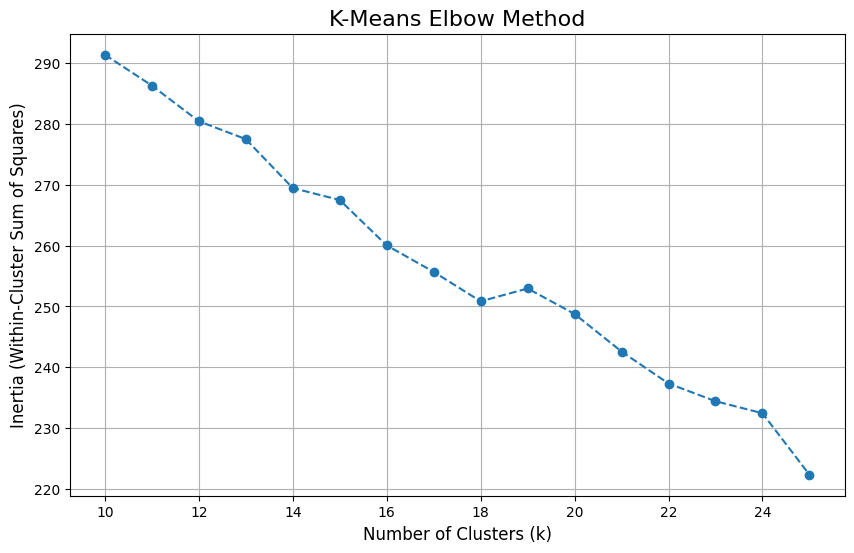

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# A list to store the inertia values for each k
inertia_list = []

# A range of k values to try
k_range = range(10, 26) 


for k in k_range:
    # Initialize KMeans
    kmeans = KMeans(
        n_clusters=k, 
        random_state=42,
        n_init=10  # Run 10 times to find the best inertia
    )
    
    # Fit the model to the data
    kmeans.fit(X_dense)
    
    # Append the inertia to our list
    inertia_list.append(kmeans.inertia_)


#  Plot the Elbow Curve 
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_list, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('K-Means Elbow Method', fontsize=16)
plt.grid(True)
plt.show()